# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [1]:
! git clone https://github.com/Brandon-Kwakye/labs

Cloning into 'labs'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 129 (delta 53), reused 61 (delta 36), pack-reused 37 (from 1)
Receiving objects: 100% (129/129), 21.08 MiB | 8.39 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
data = pd.read_csv('./labs/04_hedonic_pricing/cars_hw.csv')
data.head()


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [14]:
data.isnull().sum()


,0
Unnamed: 0,0
Make,0
Make_Year,0
Color,0
Body_Type,0
Mileage_Run,0
No_of_Owners,0
Seating_Capacity,0
Fuel_Type,0
Transmission,0


In [15]:
data = data.dropna()  # or try filling if appropriate


In [16]:
data.describe()


,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,976.000000,9.760000e+02
mean,488.500000,2016.963115,41571.195697,5.095287,7.410195e+05
std,281.891232,2.818742,24390.995134,0.446224,3.673234e+05
min,1.000000,2011.000000,1117.000000,4.000000,1.880000e+05
25%,244.750000,2015.000000,22676.750000,5.000000,4.757500e+05
50%,488.500000,2017.000000,37570.500000,5.000000,6.665000e+05
75%,732.250000,2019.000000,57421.250000,5.000000,8.830000e+05
max,976.000000,2022.000000,99495.000000,8.000000,2.941000e+06


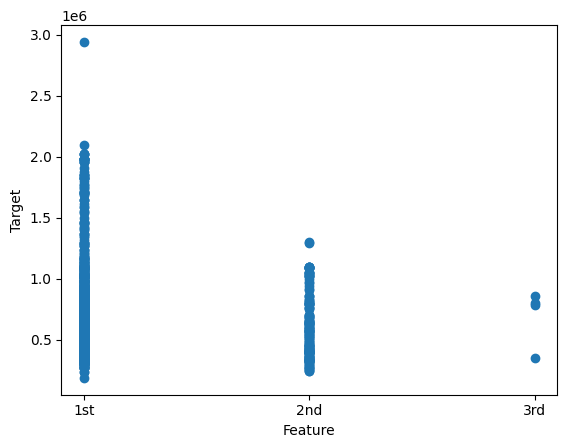

In [19]:
plt.scatter(data['No_of_Owners'], data['Price'])  # Replace with actual column names
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()


In [20]:
data_encoded = pd.get_dummies(data, drop_first=True)


In [21]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('Price', axis=1)  # Replace 'Price' with your target variable
y = data_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Train R^2: {train_r2}, Test R^2: {test_r2}")


Train RMSE: 141148.29204256518, Test RMSE: 145117.59426198687
Train R^2: 0.8572664053124003, Test R^2: 0.8163910583949119


In [28]:
data_encoded['interaction_term'] = data_encoded['Make_Year'] * data_encoded['No_of_Owners_2nd']  # Replace with actual features
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

complex_model = LinearRegression()
complex_model.fit(X_train, y_train)


LinearRegression()

In [29]:
y_train_pred_complex = complex_model.predict(X_train)
y_test_pred_complex = complex_model.predict(X_test)

train_rmse_complex = np.sqrt(mean_squared_error(y_train, y_train_pred_complex))
test_rmse_complex = np.sqrt(mean_squared_error(y_test, y_test_pred_complex))
train_r2_complex = r2_score(y_train, y_train_pred_complex)
test_r2_complex = r2_score(y_test, y_test_pred_complex)

print(f"Complex Model Train RMSE: {train_rmse_complex}, Test RMSE: {test_rmse_complex}")
print(f"Complex Model Train R^2: {train_r2_complex}, Test R^2: {test_r2_complex}")


Complex Model Train RMSE: 141130.28607379916, Test RMSE: 145122.82760328052
Complex Model Train R^2: 0.8573028193941077, Test R^2: 0.8163778152649246
